#Load Data

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/TugasPraktikumML_212-202"

In [4]:
%cd /content/drive/MyDrive/TugasPraktikumML_212-202

/content/drive/MyDrive/TugasPraktikumML_212-202


In [5]:
!ls -a

'A survey on 3D mask presentation attack detection and countermeasures.pdf'
 Dataset
 Dataset_filter
 face-mask-detection.zip
 .git
 .gitignore
 kaggle.json
 README.md
 sprint_project.xlsx
 team_details.xlsx
 Try1_H.ipynb


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d vijaykumar1799/face-mask-detection

face-mask-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!ls -a

'A survey on 3D mask presentation attack detection and countermeasures.pdf'
 Dataset
 Dataset_filter
 face-mask-detection.zip
 .git
 .gitignore
 kaggle.json
 README.md
 sprint_project.xlsx
 team_details.xlsx
 Try1_H.ipynb


In [10]:
from zipfile import ZipFile
file_name = 'face-mask-detection.zip'

with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print('Berhasil')

Berhasil


In [11]:
import os
base_dataset = '/content/drive/MyDrive/TugasPraktikumML_212-202/Dataset'
class_dir = ['mask_weared_incorrect', 'with_mask', 'without_mask' ]
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [12]:
pip install split-folders

In [13]:
#pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/TugasPraktikumML_212-202/Dataset',
                   output="/content/drive/MyDrive/TugasPraktikumML_212-202/Dataset_filter",
                   seed=42, ratio=(0.7,0.3), group_prefix=None)

Copying files: 8982 files [02:25, 61.85 files/s]


In [14]:
# Definisikan path untuk data train dan data validation

base_dir = '/content/drive/MyDrive/TugasPraktikumML_212-202/Dataset_filter'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_mask_weared_incorrect_dir = os.path.join(train_dir, 'mask_weared_incorrect')
train_with_mask_dir = os.path.join(train_dir, 'with_mask')
train_without_mask  = os.path.join(train_dir, 'without_mask')

validation_mask_weared_incorrect_dir = os.path.join(validation_dir, 'mask_weared_incorrect')
validation_with_mask_dir = os.path.join(validation_dir, 'with_mask')
validation_without_mask  = os.path.join(validation_dir, 'without_mask')

In [15]:
print('Train Mask Wared Incorrect :', os.listdir(train_mask_weared_incorrect_dir)[:2])
print('Train With Mask :', os.listdir(train_with_mask_dir)[:2])
print('Train Without Mask : ',  os.listdir(train_without_mask)[:2])
print()
print('Val Mask Wared Incorrect :', os.listdir(validation_mask_weared_incorrect_dir)[:2])
print('Val With Mask :', os.listdir(validation_with_mask_dir)[:2])
print('Val Without Mask : ',  os.listdir(validation_without_mask)[:2])


Train Mask Wared Incorrect : ['2860.png', '1077.png']
Train With Mask : ['2863.png', '1077.png']
Train Without Mask :  ['2860.png', '1077.png']

Val Mask Wared Incorrect : ['482.png', '558.png']
Val With Mask : ['482.png', '558.png']
Val Without Mask :  ['482.png', '558.png']


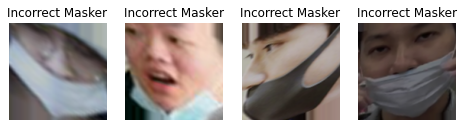

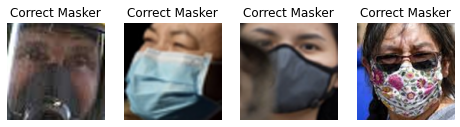

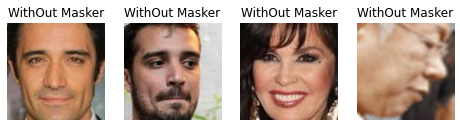

In [16]:
#1.3 Gambar
# Tampilkan 8 image per kelas dengan ukuran 2x4

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mping

mask_wear_incorr = os.listdir(train_mask_weared_incorrect_dir)
with_mask = os.listdir(train_with_mask_dir)
without_mask = os.listdir(train_without_mask)

fname1 = [os.path.join(train_mask_weared_incorrect_dir, fname)
        for fname in mask_wear_incorr[:4]]
fname2 = [os.path.join(train_with_mask_dir, fname)
        for fname in with_mask[:4]]
fname3 = [os.path.join(train_without_mask, fname)
        for fname in without_mask[:4]]


nrows = 2
ncols = 4
#Incorrect Masker
fig = plt.gcf()
fig.set_size_inches( ncols * 2,nrows * 2)
for i,fname in enumerate(fname1):
  sp = plt.subplot(2,4,i+1)
  sp.axis('off')
  img = mping.imread(fname)
  plt.title('Incorrect Masker')
  plt.imshow(img)
plt.show()

#WithMask
nrows = 2
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 2,nrows * 2)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Correct Masker')
    plt.imshow(img)
    
plt.show()

#WithMask
nrows = 2
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 2,nrows * 2)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('WithOut Masker')
    plt.imshow(img)
    
plt.show()

#Preprocessing

In [17]:
#2.1 Gathering data set 
import cv2
import numpy as np

#Gathering Data

train_data = []
train_label = []

for r, d ,f in os.walk('Dataset_filter/train'):
  for file in f:
    if ".png" in file:
      imagePath = os.path.join(r, file)
      image = cv2.imread(imagePath)
      image = cv2.resize(image, (250,250))
      train_data.append(image)

      label = imagePath.split(os.path.sep)[-2]
      train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)


In [18]:
import cv2
import numpy as np

#Gathering Data

val_data = []
val_label = []

for r, d ,f in os.walk('Dataset_filter/val'):
  for file in f:
    if ".png" in file:
      imagePath = os.path.join(r, file)
      image = cv2.imread(imagePath)
      image = cv2.resize(image, (250,250))
      val_data.append(image)

      label = imagePath.split(os.path.sep)[-2]
      val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [19]:
#2.2 Normaliasi :
print('Data sebelum di normalisasi : ', train_data[0][0][0])
x_train = train_data.astype('float32')/255.0
x_val = val_data.astype('float32')/255.0
print('Data sebelum di normalisasi : ', x_train[0][0][0])

Data sebelum di normalisasi :  [65 66 63]
Data sebelum di normalisasi :  [0.25490198 0.25882354 0.24705882]


In [20]:
#2.3 Encoder Label :
from sklearn.preprocessing import LabelEncoder
print("Label Sebelum di encoder : ", train_label[1:5])
lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)
print("Label Setelah di encoder : ", y_train[1:5])

Label Sebelum di encoder :  ['mask_weared_incorrect' 'mask_weared_incorrect' 'mask_weared_incorrect'
 'mask_weared_incorrect']
Label Setelah di encoder :  [0 0 0 0]


#3. Modelling

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D, GlobalMaxPooling2D,  GlobalAveragePooling2D

In [22]:
#Membuat & menampilkan scenario Pertama
#Model 1
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0

In [23]:
#Training Model 1 
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.1), 
              loss='binary_crossentropy', 
              metrics=['acc'])
H = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
197/197 [==============================] - 382s 2s/step - loss: -284598294108176384.0000 - acc: 0.3333 - val_loss: -3496378531728850944.0000 - val_acc: 0.3333
Epoch 2/15
197/197 [==============================] - 380s 2s/step - loss: -212699081834011557888.0000 - acc: 0.3333 - val_loss: -1021190722925050724352.0000 - val_acc: 0.3333
Epoch 3/15
197/197 [==============================] - 377s 2s/step - loss: -5764314789058455797760.0000 - acc: 0.3333 - val_loss: -18080268157631904874496.0000 - val_acc: 0.3333
Epoch 4/15
197/197 [==============================] - 375s 2s/step - loss: nan - acc: 0.3321 - val_loss: nan - val_acc: 0.3333
Epoch 5/15
197/197 [==============================] - 386s 2s/step - loss: nan - acc: 0.3333 - val_loss: nan - val_acc: 0.3333
Epoch 6/15
197/197 [==============================] - 375s 2s/step - loss: nan - acc: 0.3333 - val_loss: nan - val_acc: 0.3333
Epoch 7/15
197/197 [==============================] - 379s 2s/step - loss: nan - acc: 0.3333 - 

In [24]:
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(GlobalAveragePooling2D())
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 32, 32, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)               

In [26]:
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.1), 
              loss='binary_crossentropy', 
              metrics=['acc'])
H2 = model2.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
197/197 [==============================] - 351s 2s/step - loss: -2231877212745760768.0000 - acc: 0.3333 - val_loss: -13849250551373496320.0000 - val_acc: 0.3333
Epoch 2/15
197/197 [==============================] - 351s 2s/step - loss: -149450264784429645824.0000 - acc: 0.3333 - val_loss: -585135599979413372928.0000 - val_acc: 0.3333
Epoch 3/15
197/197 [==============================] - 351s 2s/step - loss: -2268245129937056432128.0000 - acc: 0.3333 - val_loss: -6467586773769470869504.0000 - val_acc: 0.3333
Epoch 4/15
197/197 [==============================] - 352s 2s/step - loss: -15122720505340494872576.0000 - acc: 0.3333 - val_loss: -33558232601579384471552.0000 - val_acc: 0.3333
Epoch 5/15
197/197 [==============================] - 352s 2s/step - loss: nan - acc: 0.3348 - val_loss: nan - val_acc: 0.3333
Epoch 6/15
197/197 [==============================] - 351s 2s/step - loss: nan - acc: 0.3333 - val_loss: nan - val_acc: 0.3333
Epoch 7/15
197/197 [=======================

In [30]:
import json

target_dir = '/content/drive/MyDrive/TugasPraktikumML_212-202'

# simpan history model pertama
history_dict = H.history
json.dump(history_dict, open(target_dir + '/H_model_pertama.json', 'w'))

# simpan model pertama dan weight-nya
model.save(target_dir + '/model1.h5')
model.save_weights(target_dir + '/model1_weights.h5')

In [31]:
import json

target_dir = '/content/drive/MyDrive/TugasPraktikumML_212-202'

# simpan history model kedua
history_dict2 = H2.history
json.dump(history_dict2, open(target_dir + '/H_model_kedua.json', 'w'))

# simpan model kedua dan weight-nya
model2.save(target_dir + '/model2.h5')
model2.save_weights(target_dir + '/model2_weights.h5')

In [32]:
from sklearn.metrics import classification_report

target_names = ['Incorrect Masker', 'Correct Masker','WithOut Masker']

pred = model.predict(x_val)
labels1 = (pred > 0.5).astype(np.int)
print('model 1')
print(classification_report(y_val,  labels1, target_names=target_names))

pred2 = model2.predict(x_val)
labels2 = (pred2 > 0.5).astype(np.int)
print('model 2')
print(classification_report(y_val, labels2, target_names=target_names))

model 1
                  precision    recall  f1-score   support

Incorrect Masker       0.33      1.00      0.50       899
  Correct Masker       0.00      0.00      0.00       899
  WithOut Masker       0.00      0.00      0.00       899

        accuracy                           0.33      2697
       macro avg       0.11      0.33      0.17      2697
    weighted avg       0.11      0.33      0.17      2697



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model 2
                  precision    recall  f1-score   support

Incorrect Masker       0.33      1.00      0.50       899
  Correct Masker       0.00      0.00      0.00       899
  WithOut Masker       0.00      0.00      0.00       899

        accuracy                           0.33      2697
       macro avg       0.11      0.33      0.17      2697
    weighted avg       0.11      0.33      0.17      2697

